In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

### **STEPS**

Dataframe about Coronavirus Group D

In [2]:
world = pd.read_csv("../../data/owid-covid-data.csv", sep = ",") #Si ponemos así la ruta, la podremos abrir de dónde sea :)
world
#src/main.py
#../GroupD_Covid19/notebooks/ariadna.py


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60689,ZWE,Africa,Zimbabwe,2021-01-13,24256.0,1017.0,921.714,589.0,38.0,22.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60690,ZWE,Africa,Zimbabwe,2021-01-14,25368.0,1112.0,956.143,636.0,47.0,27.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60691,ZWE,Africa,Zimbabwe,2021-01-15,26109.0,741.0,921.286,666.0,30.0,28.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60692,ZWE,Africa,Zimbabwe,2021-01-16,26881.0,772.0,911.714,683.0,17.0,28.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [3]:
world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [4]:
#Aquí los NaNs de todo el df

world.isnull().sum()

iso_code                                   346
continent                                  708
location                                     0
date                                         0
total_cases                                585
new_cases                                  592
new_cases_smoothed                        1547
total_deaths                              9048
new_deaths                                9049
new_deaths_smoothed                       1547
total_cases_per_million                    931
new_cases_per_million                      938
new_cases_smoothed_per_million            1888
total_deaths_per_million                  9381
new_deaths_per_million                    9382
new_deaths_smoothed_per_million           1888
reproduction_rate                        11938
icu_patients                             54154
icu_patients_per_million                 54154
hosp_patients                            53103
hosp_patients_per_million                53103
weekly_icu_ad

In [5]:
#df completo con las columnas que hemos aprovado con el criterio de menos NaNs para hacer las tendencias!!!

world = world.drop(world.columns.difference(["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "new_cases_per_million", "total_deaths_per_million", "aged_65_older", "population", "population_density", "cardiovasc_death_rate", "hospital_beds_per_thousand", "life_expectancy"]), 1)
world

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,total_deaths_per_million,population,population_density,aged_65_older,cardiovasc_death_rate,hospital_beds_per_thousand,life_expectancy
0,AFG,2020-02-24,1.0,1.0,NaN,NaN,0.026,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
1,AFG,2020-02-25,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
2,AFG,2020-02-26,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
3,AFG,2020-02-27,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
4,AFG,2020-02-28,1.0,0.0,NaN,NaN,0.000,NaN,38928341.0,54.422,2.581,597.029,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60689,ZWE,2021-01-13,24256.0,1017.0,589.0,38.0,68.425,39.629,14862927.0,42.729,2.822,307.846,1.7,61.49
60690,ZWE,2021-01-14,25368.0,1112.0,636.0,47.0,74.817,42.791,14862927.0,42.729,2.822,307.846,1.7,61.49
60691,ZWE,2021-01-15,26109.0,741.0,666.0,30.0,49.856,44.809,14862927.0,42.729,2.822,307.846,1.7,61.49
60692,ZWE,2021-01-16,26881.0,772.0,683.0,17.0,51.941,45.953,14862927.0,42.729,2.822,307.846,1.7,61.49


### **TO DELETE NaN's IN 5 DF's ABOUT COUNTRIES**

In [6]:
uk = world[world["iso_code"]=="GBR"]

uk = uk.drop(uk.columns.difference(["iso_code", "date", "total_cases", "total_deaths", "total_deaths_per_million"]), 1)
uk

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
57046,GBR,2020-01-31,2.0,NaN,NaN
57047,GBR,2020-02-01,2.0,NaN,NaN
57048,GBR,2020-02-02,2.0,NaN,NaN
57049,GBR,2020-02-03,8.0,NaN,NaN
57050,GBR,2020-02-04,8.0,NaN,NaN
...,...,...,...,...,...
57394,GBR,2021-01-13,3220953.0,84910.0,1250.773
57395,GBR,2021-01-14,3269757.0,86163.0,1269.231
57396,GBR,2021-01-15,3325642.0,87448.0,1288.159
57397,GBR,2021-01-16,3367070.0,88747.0,1307.295


In [7]:
GBR = uk.dropna(how= "any", inplace = False)
GBR

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
57081,GBR,2020-03-06,374.0,1.0,0.015
57082,GBR,2020-03-07,429.0,2.0,0.029
57083,GBR,2020-03-08,483.0,2.0,0.029
57084,GBR,2020-03-09,630.0,3.0,0.044
57085,GBR,2020-03-10,889.0,7.0,0.103
...,...,...,...,...,...
57394,GBR,2021-01-13,3220953.0,84910.0,1250.773
57395,GBR,2021-01-14,3269757.0,86163.0,1269.231
57396,GBR,2021-01-15,3325642.0,87448.0,1288.159
57397,GBR,2021-01-16,3367070.0,88747.0,1307.295


In [8]:
uk.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
total_deaths                35
total_deaths_per_million    35
dtype: int64

In [9]:
port = world[world["iso_code"]=="PRT"]

port = port.drop(port.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
port

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
43593,PRT,2020-02-02,NaN,NaN,NaN
43594,PRT,2020-02-09,NaN,NaN,NaN
43595,PRT,2020-02-15,NaN,NaN,NaN
43596,PRT,2020-02-23,NaN,NaN,NaN
43597,PRT,2020-03-01,NaN,NaN,NaN
...,...,...,...,...,...
43915,PRT,2021-01-13,507108.0,8236.0,807.712
43916,PRT,2021-01-14,517806.0,8384.0,822.226
43917,PRT,2021-01-15,528469.0,8543.0,837.820
43918,PRT,2021-01-16,539416.0,8709.0,854.099


In [10]:
PRT = port.dropna(how= "any", inplace = False)
PRT

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
43613,PRT,2020-03-17,448.0,1.0,0.098
43614,PRT,2020-03-18,448.0,2.0,0.196
43615,PRT,2020-03-19,785.0,3.0,0.294
43616,PRT,2020-03-20,1020.0,6.0,0.588
43617,PRT,2020-03-21,1280.0,12.0,1.177
...,...,...,...,...,...
43915,PRT,2021-01-13,507108.0,8236.0,807.712
43916,PRT,2021-01-14,517806.0,8384.0,822.226
43917,PRT,2021-01-15,528469.0,8543.0,837.820
43918,PRT,2021-01-16,539416.0,8709.0,854.099


In [11]:
port.isnull().sum()

iso_code                     0
date                         0
total_cases                  5
total_deaths                20
total_deaths_per_million    20
dtype: int64

In [12]:
turk = world[world["iso_code"]=="TUR"]

turk = turk.drop(turk.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
turk

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
55753,TUR,2020-03-11,1.0,NaN,NaN
55754,TUR,2020-03-12,1.0,NaN,NaN
55755,TUR,2020-03-13,5.0,NaN,NaN
55756,TUR,2020-03-14,5.0,NaN,NaN
55757,TUR,2020-03-15,6.0,NaN,NaN
...,...,...,...,...,...
56062,TUR,2021-01-14,2364801.0,23495.0,278.578
56063,TUR,2021-01-15,2373115.0,23664.0,280.582
56064,TUR,2021-01-16,2380665.0,23832.0,282.574
56065,TUR,2021-01-17,2387101.0,23997.0,284.530


In [13]:
TUR = turk.dropna(how= "any", inplace = False)
TUR

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
55759,TUR,2020-03-17,47.0,1.0,0.012
55760,TUR,2020-03-18,98.0,1.0,0.012
55761,TUR,2020-03-19,192.0,3.0,0.036
55762,TUR,2020-03-20,359.0,4.0,0.047
55763,TUR,2020-03-21,670.0,9.0,0.107
...,...,...,...,...,...
56061,TUR,2021-01-13,2355839.0,23325.0,276.562
56062,TUR,2021-01-14,2364801.0,23495.0,278.578
56063,TUR,2021-01-15,2373115.0,23664.0,280.582
56064,TUR,2021-01-16,2380665.0,23832.0,282.574


In [14]:
turk.isnull().sum()

iso_code                    0
date                        0
total_cases                 1
total_deaths                7
total_deaths_per_million    7
dtype: int64

In [15]:
esp = world[world["iso_code"]=="ESP"]

esp = esp.drop(esp.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
esp

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
50838,ESP,2020-02-01,1.0,NaN,NaN
50839,ESP,2020-02-02,1.0,NaN,NaN
50840,ESP,2020-02-03,1.0,NaN,NaN
50841,ESP,2020-02-04,1.0,NaN,NaN
50842,ESP,2020-02-05,1.0,NaN,NaN
...,...,...,...,...,...
51185,ESP,2021-01-13,2176089.0,52878.0,1130.965
51186,ESP,2021-01-14,2211967.0,53079.0,1135.264
51187,ESP,2021-01-15,2252164.0,53314.0,1140.290
51188,ESP,2021-01-16,2252164.0,53314.0,1140.290


In [16]:
ESP = esp.dropna(how= "any", inplace = False)
ESP

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
50869,ESP,2020-03-03,165.0,1.0,0.021
50870,ESP,2020-03-04,222.0,2.0,0.043
50871,ESP,2020-03-05,259.0,3.0,0.064
50872,ESP,2020-03-06,400.0,5.0,0.107
50873,ESP,2020-03-07,500.0,10.0,0.214
...,...,...,...,...,...
51185,ESP,2021-01-13,2176089.0,52878.0,1130.965
51186,ESP,2021-01-14,2211967.0,53079.0,1135.264
51187,ESP,2021-01-15,2252164.0,53314.0,1140.290
51188,ESP,2021-01-16,2252164.0,53314.0,1140.290


In [17]:
esp.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
total_deaths                31
total_deaths_per_million    31
dtype: int64

In [18]:
ven = world[world["iso_code"]=="VEN"]

ven = ven.drop(ven.columns.difference(["iso_code","date",'total_cases',"total_deaths", 'total_deaths_per_million']), 1)
ven

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
58768,VEN,2020-03-14,2.0,NaN,NaN
58769,VEN,2020-03-15,10.0,NaN,NaN
58770,VEN,2020-03-16,17.0,NaN,NaN
58771,VEN,2020-03-17,33.0,NaN,NaN
58772,VEN,2020-03-18,36.0,NaN,NaN
...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,1084.0,38.121
59074,VEN,2021-01-14,118415.0,1090.0,38.332
59075,VEN,2021-01-15,118856.0,1095.0,38.508
59076,VEN,2021-01-16,119306.0,1101.0,38.719


In [19]:
VEN = ven.dropna(how= "any", inplace = False)
VEN

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
58781,VEN,2020-03-27,107.0,1.0,0.035
58782,VEN,2020-03-28,119.0,2.0,0.070
58783,VEN,2020-03-29,119.0,2.0,0.070
58784,VEN,2020-03-30,135.0,3.0,0.106
58785,VEN,2020-03-31,135.0,3.0,0.106
...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,1084.0,38.121
59074,VEN,2021-01-14,118415.0,1090.0,38.332
59075,VEN,2021-01-15,118856.0,1095.0,38.508
59076,VEN,2021-01-16,119306.0,1101.0,38.719


In [20]:
ven.isnull().sum()

iso_code                     0
date                         0
total_cases                  0
total_deaths                13
total_deaths_per_million    13
dtype: int64

### **TO CONCAT 5 DF's ABOUT COUNTRIES**

In [21]:
#To concat 5 df's

df10 = pd.concat([GBR, PRT, TUR, ESP, VEN])
df10

,iso_code,date,total_cases,total_deaths,total_deaths_per_million
57081,GBR,2020-03-06,374.0,1.0,0.015
57082,GBR,2020-03-07,429.0,2.0,0.029
57083,GBR,2020-03-08,483.0,2.0,0.029
57084,GBR,2020-03-09,630.0,3.0,0.044
57085,GBR,2020-03-10,889.0,7.0,0.103
...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,1084.0,38.121
59074,VEN,2021-01-14,118415.0,1090.0,38.332
59075,VEN,2021-01-15,118856.0,1095.0,38.508
59076,VEN,2021-01-16,119306.0,1101.0,38.719


In [22]:
#To add a new colum "life_expectancy" from worl dataframe (on the bottom info)
Q10 = df10.join(world["life_expectancy"])
Q10


,iso_code,date,total_cases,total_deaths,total_deaths_per_million,life_expectancy
57081,GBR,2020-03-06,374.0,1.0,0.015,81.32
57082,GBR,2020-03-07,429.0,2.0,0.029,81.32
57083,GBR,2020-03-08,483.0,2.0,0.029,81.32
57084,GBR,2020-03-09,630.0,3.0,0.044,81.32
57085,GBR,2020-03-10,889.0,7.0,0.103,81.32
...,...,...,...,...,...,...
59073,VEN,2021-01-13,117811.0,1084.0,38.121,72.06
59074,VEN,2021-01-14,118415.0,1090.0,38.332,72.06
59075,VEN,2021-01-15,118856.0,1095.0,38.508,72.06
59076,VEN,2021-01-16,119306.0,1101.0,38.719,72.06


In [23]:
countries = Q10["iso_code"]
countries

57081    GBR
57082    GBR
57083    GBR
57084    GBR
57085    GBR
        ... 
59073    VEN
59074    VEN
59075    VEN
59076    VEN
59077    VEN
Name: iso_code, Length: 1550, dtype: object

In [24]:
suma_total_deaths = world["new_deaths"].sum(skipna = True)
suma_total_deaths

4061576.0

In [25]:
#df_posicion = world.groupby("iso_code").sum("new_deaths", "new_cases").dropna(how= "any", inplace = False).drop(world.columns.difference(["iso_code","date",'total_cases',"total_deaths", "life_expectancy"]), 1)
df_posicion = world.groupby("iso_code").sum(["new_deaths", "new_cases"]).drop(world.columns.difference(["iso_code","date","new_cases", "new_deaths"]), 1)
"""df_posicion = df_posicion.columns.astype(int)"""
df_posicion

,new_cases,new_deaths
iso_code,,
AFG,53984.0,2339.0
AGO,18875.0,436.0
ALB,67690.0,1277.0
AND,9083.0,91.0
ARE,253261.0,745.0
...,...,...
WSM,2.0,0.0
YEM,2112.0,612.0
ZAF,1337926.0,37105.0


In [26]:
#uk = world[world["iso_code"]=="GBR"]
#df.sort(['Player', 'Year', 'Tm'], ascending = [True, True, sorter])
df_posicion = df_posicion.rank().sort_values(by=["new_cases", "new_deaths"], ascending=True)
df_posicion

,new_cases,new_deaths
iso_code,,
HKG,1.0,6.0
VUT,2.0,6.0
WSM,3.0,6.0
MHL,4.0,6.0
SLB,5.0,6.0
...,...,...
RUS,187.0,183.0
BRA,188.0,189.0
IND,189.0,188.0


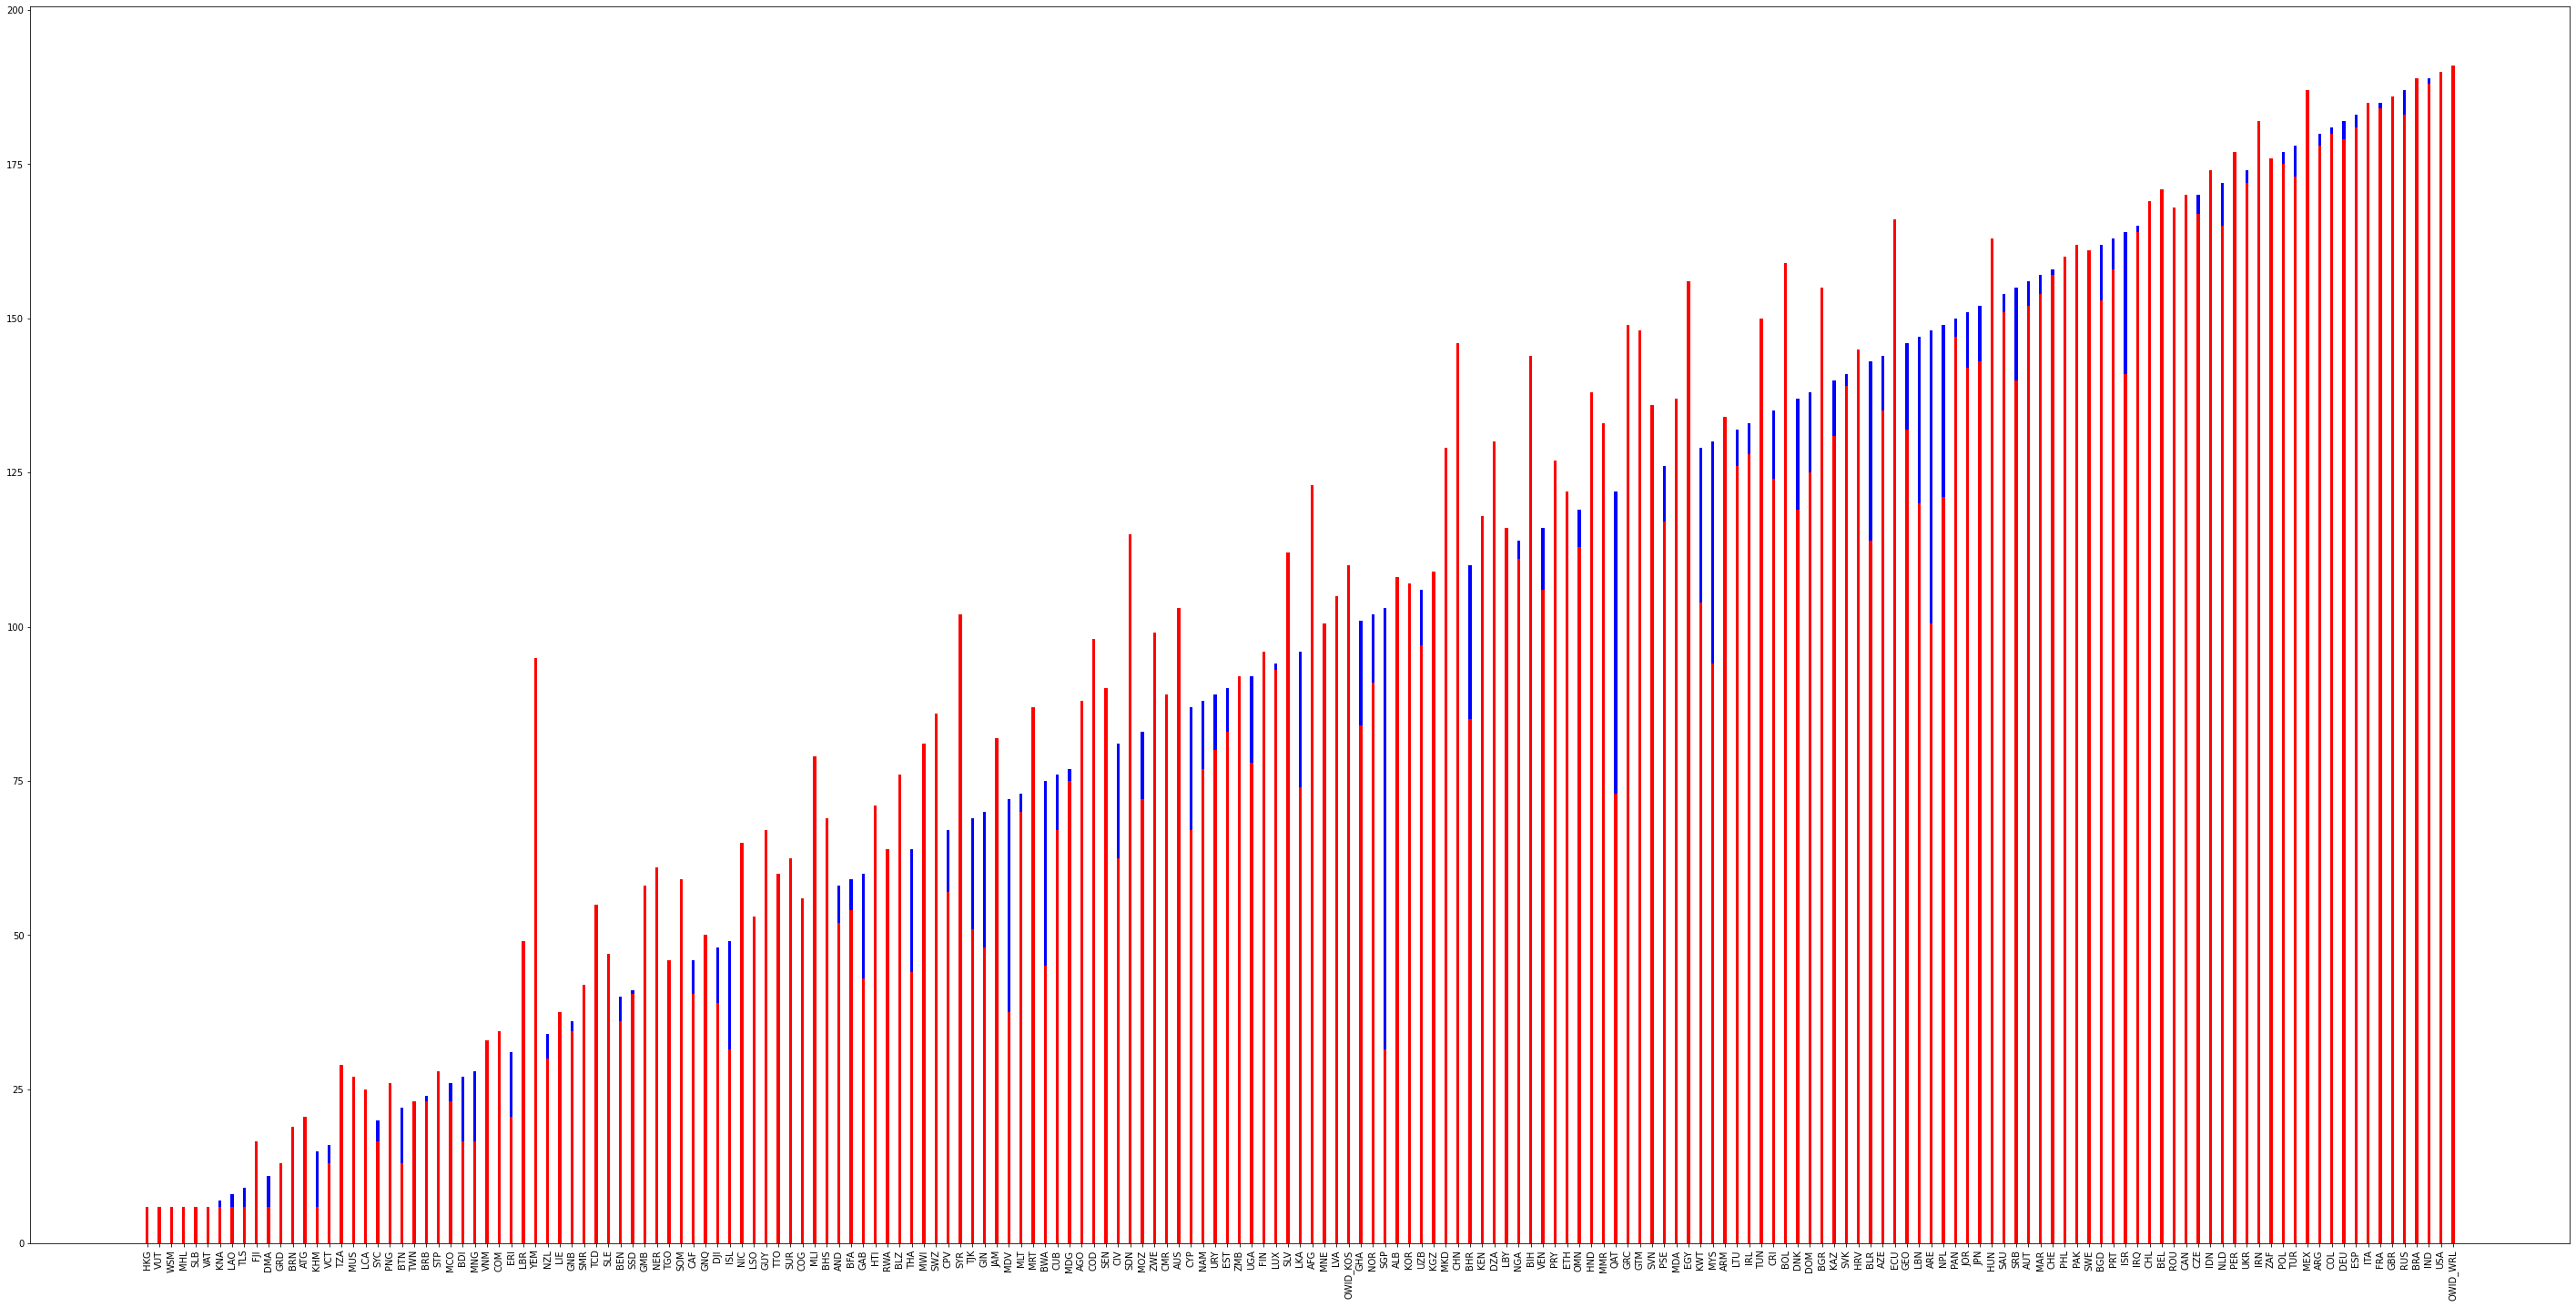

In [30]:
fig = plt.figure(figsize=(50, 25))
x = df_posicion.index
plt.bar(x, df_posicion["new_cases"], color='b', width= 0.25)
plt.bar(x, df_posicion["new_deaths"], color='r', width= 0.25)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
fig = plt.figure(figsize=(50, 25))
x = df_posicion.index
plt.bar(x, df_posicion["new_cases"], color='b', width= 0.25)
plt.bar(x, df_posicion["new_deaths"], color='r', width= 0.25)
plt.show()